In [74]:
######### Question 3 #########

## data ##
using DataFrames, CSV, LinearAlgebra
using StatsModels
a = [19, 2, 9, 4, 5, 6, 3, 11, 14, 17, 1, 20]
b = [7.9, 25.0, 13.1, 17.4, 19.5, 13.0, 17.8, 8.0, 9.2, 6.3, 42.0, 6.6]

function f(x)
    return sum((b - x[1]*a.^x[2]).^2)
end

function ∇f(x)
    return [-2*sum((b - x[1]*a.^x[2]).*(a.^x[2])), -2*sum((b - x[1]*a.^x[2]).*(x[1]*a.^x[2]).*(log.(a))) ]
end

function ∇2f(x)
    h11 = 2*sum(a.^(2*x[2]))
    h12 = -2*sum((b.*a.^x[2].*log.(a))-(2*x[1].*(a.^(2*x[2])).*log.(a)))
    h21 = h12
    h22 = -2*sum((b*x[1].*((log.(a)).^2).*(a.^x[2]))-(2*(x[1]^2).*((log.(a)).^2).*(a.^(2*x[2])))) 
    return [h11 h12; h21 h22]
end

∇2f (generic function with 1 method)

In [73]:
## a ##
function line_search(f, ∇f, x, p; strong=true, c1=1e-4, c2=0.9, rho=0.75)
    α = 1    # initial step length = 1 required for newton-like methods
    if strong == true
        while f(x + α*p) > f(x) + c1*α*∇f(x)'*p || abs(dot(∇f(x + α*p),p)) > c2*abs(dot(∇f(x),p))
            α = rho * α
        end
    else
        while f(x + α*p) > f(x) + c1*α*transpose(∇f(x))*p || transpose(∇f(x + α*p))*p < c2*transpose(∇f(x))*p
            α = rho * α
        end
    end
    return α
end

function steepest_descent(f, ∇f, x; ϵ=1e-1, k=10)
    i = 1
    while norm(∇f(x)) > ϵ
        # compute the direction
        B = -I       # steepest descent
        p = B * ∇f(x)
        
        # determine the step size
        α = line_search(f, ∇f, x, p, c1=.1)

        x = x + α*p  # the new iterate
        i % k == 0 && println("iteration ", i, ": step size = ", α, ", x = ", x)
        i += 1
    end
    return x
end

x0 = [1, 1]
sd = steepest_descent(f, ∇f, x0, k=500)

iteration 500: step size = 0.00013393656762751105, x = [12.00864205664398, -0.019098160165934012]
iteration 1000: step size = 0.00013393656762751105, x = [17.968759877364107, -0.18812590034530932]
iteration 1500: step size = 0.00017858209017001473, x = [22.460434359065008, -0.28789235786949974]
iteration 2000: step size = 0.00013393656762751105, x = [26.025052749157844, -0.3601651905605745]
iteration 2500: step size = 0.00017858209017001473, x = [28.892731572087445, -0.41024385073844]
iteration 3000: step size = 0.00017858209017001473, x = [31.20870102466586, -0.45148960797770427]
iteration 3500: step size = 0.00017858209017001473, x = [33.08137205269972, -0.4820132220405172]
iteration 4000: step size = 0.00017858209017001473, x = [34.59061393288675, -0.5081386549327069]
iteration 4500: step size = 0.00017858209017001473, x = [35.80653017931309, -0.5273787225221492]
iteration 5000: step size = 0.00017858209017001473, x = [36.783564746895266, -0.5428611296044219]
iteration 5500: step si

2-element Vector{Float64}:
 40.66555961055281
 -0.6020700717963826

In [63]:
## b ##
using DataFrames, CSV, LinearAlgebra
using StatsModels

function cholesky_plus(A) #assumes A is square matrix
    δ = 0.001
    min = A[1, 1]
    for i in range(start = 1, stop = size(A,1), step = 1)
        if A[i, i] < min
            min = A[i, i]
        end
    end
    if min > 0
        τ = 0
    else 
        τ = (-1) * min + δ
    end
    
    for k in range(start = 1, stop = 10000, step = 1)
        try
            C = cholesky(A)
            return C
        catch
            println("modifying A")
            τ = max(2*τ,δ)
            A = A + τ*I
        end
    end
    println("giving up after 10,000 iterations")
end

function newton(f, ∇f, ∇2f, x; ϵ=1e-1, k=10)
    i = 1
    
    
    while norm(∇f(x)) > ϵ
        C = cholesky_plus(∇2f(x))
        z = C.L \ -∇f(x)
        p = C.U \ z #search direction
        
        α = line_search(f, ∇f, x, p, c1=.1)
        #α = 1
        x = x + α*p  # the new iterate
        i % k == 0 && println("iteration ", i, ". x = ", x)
        i += 1
    end
    return x
end


C = cholesky_plus(∇2f(x0))
z = C.L \ -∇f(x0)
p = C.U \ z #search direction

n = newton(f, ∇f,∇2f, x0, k=1)

modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
iteration 1. x = [3.300644802659735, 0.1341422933347548]
modifying A
iteration 2. x = [3.514073297395536, 0.5087037570314688]
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
modifying A
iteration 3. x = [24.32546430641866, -1.6376252213551319]
modifying A
iteration 4. x = [24.378205689406986, -0.7420452729922361]
modifying A
iteration 5. x = [24.395693547296567, -0.16132295709374223]
iteration 6. 

2-element Vector{Float64}:
 40.68830421259653
 -0.6023936821552892

In [ ]:
## c ##
# The newton method only takes 9 iterations to converage while the steepest 
# descent method takes over 15,000 iterations to converage.
# The models for each of the models are very similar to eachother, I cannot even see two
# distinct curves on the graph.

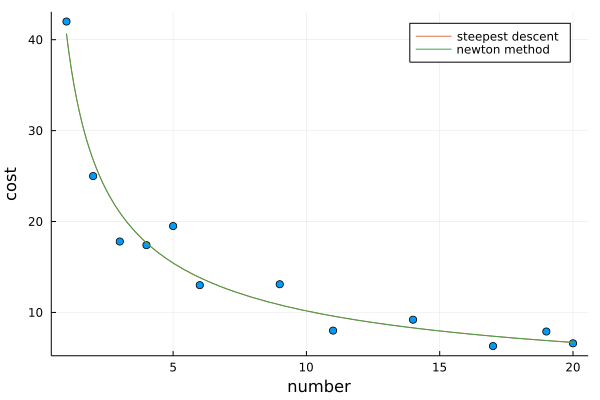

In [72]:
## d ##
using Plots
scatter(a, b, label="", xlabel="number", ylabel="cost", fmt = :png)
steep(x) = sd[1] * x^sd[2]
new(x) = n[1] * x^n[2]
plot!(steep, label = "steepest descent", legend = :topright)
plot!(new, label = "newton method", legend = :topright)